In [1]:
import os
ROOT_DIR = '/Users/halmagyi/Documents/MachineLearning/ML_Notes/NeuralNetworks_Numpy/nnets_numpy'
os.chdir(ROOT_DIR)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers

In [41]:
X_train_ = np.arange(0, 10, 0.2)
len(X_train_)

50

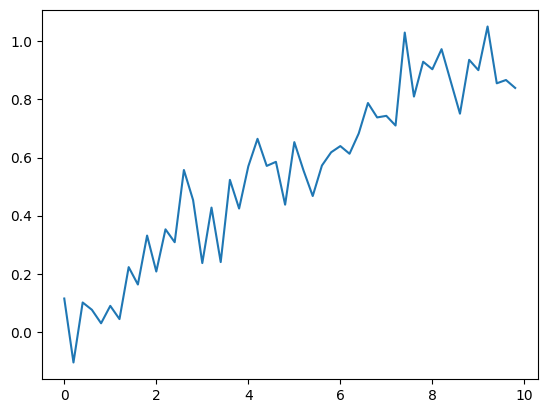

In [42]:
# data_size = 10
# data = np.array(list(range(0, data_size))).reshape(data_size,1)
data = np.arange(0, 10, 0.2)
data_size = len(data)

mu, sigma = 0, 0.1
noise = np.random.default_rng().normal(loc=mu, scale=sigma, size=data_size).reshape(data_size,1)

y_true = np.array([np.sin(2* np.pi * x /data_size) for x in data]).reshape(data_size,1)
y_true = y_true + noise

plt.plot(data, y_true)
plt.show()

In [43]:
dropout = False
width = 100
num_layers = 5

learning_rate=10**(-5)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
regularizer = regularizers.L2(1e-4)
inputs = Input(shape=(1,))

x = Dense(width, 
            activation='relu',
            kernel_regularizer=regularizer,
            bias_regularizer=regularizer)(inputs)
if dropout:
    x = Dropout(0.2)(x)

for _ in range(num_layers-1):
    x = Dense(width, 
            activation='relu',
            kernel_regularizer=regularizer,
            bias_regularizer=regularizer)(x)
    if dropout:
        x = Dropout(0.2)(x)

outputs = Dense(1, activation=None,
            kernel_regularizer=regularizer,
            bias_regularizer=regularizer)(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mse'])

# print(model.summary())

In [44]:
batch_size = data_size
epochs = 20

model.fit(x=data, 
          y=y_true,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data = (data, y_true))

Epoch 1/20
1/1 [==============================] - 1s 751ms/step - loss: 0.3675 - mse: 0.3274 - val_loss: 0.3670 - val_mse: 0.3269
Epoch 2/20
1/1 [==============================] - 0s 29ms/step - loss: 0.3670 - mse: 0.3269 - val_loss: 0.3666 - val_mse: 0.3265
Epoch 3/20
1/1 [==============================] - 0s 28ms/step - loss: 0.3666 - mse: 0.3265 - val_loss: 0.3661 - val_mse: 0.3260
Epoch 4/20
1/1 [==============================] - 0s 28ms/step - loss: 0.3661 - mse: 0.3260 - val_loss: 0.3656 - val_mse: 0.3256
Epoch 5/20
1/1 [==============================] - 0s 29ms/step - loss: 0.3656 - mse: 0.3256 - val_loss: 0.3652 - val_mse: 0.3251
Epoch 6/20
1/1 [==============================] - 0s 27ms/step - loss: 0.3652 - mse: 0.3251 - val_loss: 0.3647 - val_mse: 0.3247
Epoch 7/20
1/1 [==============================] - 0s 28ms/step - loss: 0.3647 - mse: 0.3247 - val_loss: 0.3643 - val_mse: 0.3242
Epoch 8/20
1/1 [==============================] - 0s 28ms/step - loss: 0.3643 - mse: 0.3242 - va

2/2 [==============================] - 0s 2ms/step


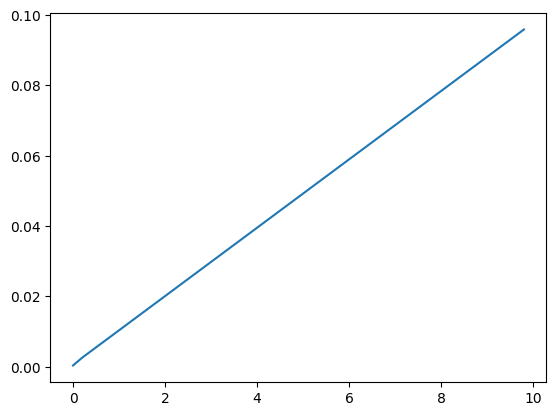

In [45]:
y_pred = model.predict(data)
plt.plot(data, y_pred)
plt.show()